<a href="https://colab.research.google.com/github/mroopeshunt/Densho-Digital-Repo-Analysis/blob/main/Sentiment%20Analysis/extracting_sentiment_terms_of_answers_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

positive = pd.read_csv(r'/content/drive/My Drive/positive_words_en.txt', sep = '\n', header = None, encoding='latin-1')
negative = pd.read_csv(r'/content/drive/My Drive/negative_words_en.txt', sep = '\n', header = None, encoding='latin-1')


In [3]:
#positive_words =
positive_lexicons = list(positive[0].values)
negative_lexicons = list(negative[0].values)

In [4]:
print(len(positive_lexicons))
print(len(negative_lexicons))

1421
2955


In [5]:
'pretty' in positive_lexicons

True

In [6]:
import pandas as pd

answers_df = pd.read_csv(r"/content/drive/My Drive/Classified_Answers.csv")
#answers_df = answers_df[:10]


# answers column has a nan value
# so filling nan values to blank string values
answers_df = answers_df.fillna('')
print(answers_df.columns)

Index(['Answers', 'class', 'Sentiment'], dtype='object')


In [7]:

result = {'class1': {}, 'class2': {}, 'class3': {}}
result['class1']['POSITIVE'] = set()
result['class1']['NEGATIVE'] = set()
result['class2']['POSITIVE'] = set()
result['class2']['NEGATIVE'] = set()
result['class3']['POSITIVE'] = set()
result['class3']['NEGATIVE'] = set()

# result_terms contains duplicate terms as well
result_terms = {'class1': {}, 'class2': {}, 'class3': {}}
result_terms['class1']['POSITIVE'] = []
result_terms['class1']['NEGATIVE'] = []
result_terms['class2']['POSITIVE'] = []
result_terms['class2']['NEGATIVE'] = []
result_terms['class3']['POSITIVE'] = []
result_terms['class3']['NEGATIVE'] = []

count = {'class1': {}, 'class2': {}, 'class3': {}}
count['class1']['POSITIVE'] = 0
count['class1']['NEGATIVE'] = 0
count['class2']['POSITIVE'] = 0
count['class2']['NEGATIVE'] = 0
count['class3']['POSITIVE'] = 0
count['class3']['NEGATIVE'] = 0


In [8]:
neg_lex = []
pos_lex = []
for class_label in [1, 2, 3]:
    for sentiment in ['NEGATIVE', 'POSITIVE']:
        print(answers_df[(answers_df['class'] == class_label) & (answers_df['Sentiment'] == sentiment)].shape)
        category_corpus = " ".join(answers_df[(answers_df['class'] == class_label) & (answers_df['Sentiment'] == sentiment)]['Answers'].values).split()
        for lexicon in negative_lexicons:
            if lexicon in category_corpus:
                if class_label == 1:
                    count['class1']['NEGATIVE'] = count['class1']['NEGATIVE'] + category_corpus.count(lexicon)
                    result['class1']['NEGATIVE'].add(lexicon)
                    for i in range(category_corpus.count(lexicon)):
                        result_terms['class1']['NEGATIVE'].append(lexicon)
                        
                elif class_label == 2:
                    count['class2']['NEGATIVE'] = count['class2']['NEGATIVE'] + category_corpus.count(lexicon)
                    result['class2']['NEGATIVE'].add(lexicon)
                    for i in range(category_corpus.count(lexicon)):
                        result_terms['class2']['NEGATIVE'].append(lexicon)
                        
                elif class_label == 3:
                    count['class3']['NEGATIVE'] = count['class3']['NEGATIVE'] + category_corpus.count(lexicon)
                    result['class3']['NEGATIVE'].add(lexicon)
                    for i in range(category_corpus.count(lexicon)):
                        result_terms['class3']['NEGATIVE'].append(lexicon)

                
        for lexicon in positive_lexicons:
            if lexicon in category_corpus:
                if class_label == 1:
                    count['class1']['POSITIVE'] = count['class1']['POSITIVE'] + category_corpus.count(lexicon)
                    result['class1']['POSITIVE'].add(lexicon)
                    for i in range(category_corpus.count(lexicon)):
                        result_terms['class1']['POSITIVE'].append(lexicon)
                        
                elif class_label == 2:
                    count['class2']['POSITIVE'] = count['class2']['POSITIVE'] + category_corpus.count(lexicon)
                    result['class2']['POSITIVE'].add(lexicon)
                    for i in range(category_corpus.count(lexicon)):
                        result_terms['class2']['POSITIVE'].append(lexicon)
                        
                elif class_label == 3:
                    count['class3']['POSITIVE'] = count['class3']['POSITIVE'] + category_corpus.count(lexicon)
                    result['class3']['POSITIVE'].add(lexicon)
                    for i in range(category_corpus.count(lexicon)):
                        result_terms['class3']['POSITIVE'].append(lexicon)

        #print(len(neg_lex))

(54909, 3)
(34068, 3)
(9757, 3)
(4615, 3)
(16326, 3)
(8816, 3)


In [9]:
unique_sentiment_lexicons = pd.DataFrame(result).T
unique_sentiment_lexicons.columns = ['Unique Positive Sentiment terms', 'Unique Negative Sentiment terms']
unique_sentiment_lexicons.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
unique_sentiment_lexicons = unique_sentiment_lexicons.reset_index(level=0)
unique_sentiment_lexicons.rename(columns={'index': 'Categories'}, inplace=True)
unique_sentiment_lexicons

,Categories,Unique Positive Sentiment terms,Unique Negative Sentiment terms
0,A: Family immigration history and childhood ex...,"{famously, incredible, meritorious, enlighten,...","{mysteriously, deadly, smells, attacks, conste..."
1,B: Internment experience and memory,"{incredible, meritorious, excellent, lovely, c...","{defective, humming, mad, insane, deadly, fall..."
2,C: Post-war experience,"{incredible, excellent, courteous, lovely, hop...","{insane, deadly, smells, attacks, impoverished..."


In [10]:
sentiment_lexicons = pd.DataFrame(result_terms).T
sentiment_lexicons.columns = ['Positive Sentiment terms', 'Negative Sentiment terms']
sentiment_lexicons.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
sentiment_lexicons = sentiment_lexicons.reset_index(level=0)
sentiment_lexicons.rename(columns={'index': 'Categories'}, inplace=True)
sentiment_lexicons

,Categories,Positive Sentiment terms,Negative Sentiment terms
0,A: Family immigration history and childhood ex...,"[well, well, well, well, well, well, well, wel...","[died, died, died, died, died, died, died, die..."
1,B: Internment experience and memory,"[well, well, well, well, well, well, well, wel...","[died, died, died, died, died, died, died, die..."
2,C: Post-war experience,"[well, well, well, well, well, well, well, wel...","[died, died, died, died, died, died, died, die..."


In [ ]:
# Count of Positive and Negative sentiment terms in each Category

In [11]:
count_df = pd.DataFrame(count).T
count_df.columns = ['Count of Positive Terms', 'Count of Negative Terms']
count_df.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
count_df = count_df.reset_index(level=0)
count_df.rename(columns={'index': 'Categories'}, inplace=True)
print("Count of Positive and Negative sentiment terms in each Category")
print()
pd.set_option('display.max_colwidth', None) 
count_df

Count of Positive and Negative sentiment terms in each Category



,Categories,Count of Positive Terms,Count of Negative Terms
0,A: Family immigration history and childhood experience,78067,34663
1,B: Internment experience and memory,13935,8226
2,C: Post-war experience,26869,14350


In [ ]:
# Count of Unique Positive and Negative sentiment terms in each Category

In [12]:
unique_count = {'class1': {}, 'class2': {}, 'class3': {}}
unique_count['class1']['POSITIVE'] = len(unique_sentiment_lexicons['Unique Positive Sentiment terms'][0])
unique_count['class1']['NEGATIVE'] = len(unique_sentiment_lexicons['Unique Negative Sentiment terms'][0])
unique_count['class2']['POSITIVE'] = len(unique_sentiment_lexicons['Unique Positive Sentiment terms'][1])
unique_count['class2']['NEGATIVE'] = len(unique_sentiment_lexicons['Unique Negative Sentiment terms'][1])
unique_count['class3']['POSITIVE'] = len(unique_sentiment_lexicons['Unique Positive Sentiment terms'][2])
unique_count['class3']['NEGATIVE'] = len(unique_sentiment_lexicons['Unique Negative Sentiment terms'][2])
unique_count_df = pd.DataFrame(unique_count).T
unique_count_df.columns = ['Unique Count of Positive Terms', 'Unique Count of Negative Terms']
unique_count_df.rename(index={'class1':'A: Family immigration history and childhood experience', 'class2': 'B: Internment experience and memory', 'class3': 'C: Post-war experience'}, inplace = True)
unique_count_df = unique_count_df.reset_index(level=0)
unique_count_df.rename(columns={'index': 'Categories'}, inplace=True)
print("Count of Unique Positive and Negative sentiment terms in each Category")
print()
pd.set_option('display.max_colwidth', None) 
unique_count_df

Count of Unique Positive and Negative sentiment terms in each Category



,Categories,Unique Count of Positive Terms,Unique Count of Negative Terms
0,A: Family immigration history and childhood experience,1062,1867
1,B: Internment experience and memory,662,1136
2,C: Post-war experience,835,1465


# WordClouds

Category: A: Family immigration history and childhood experience, Positive Sentiment terms


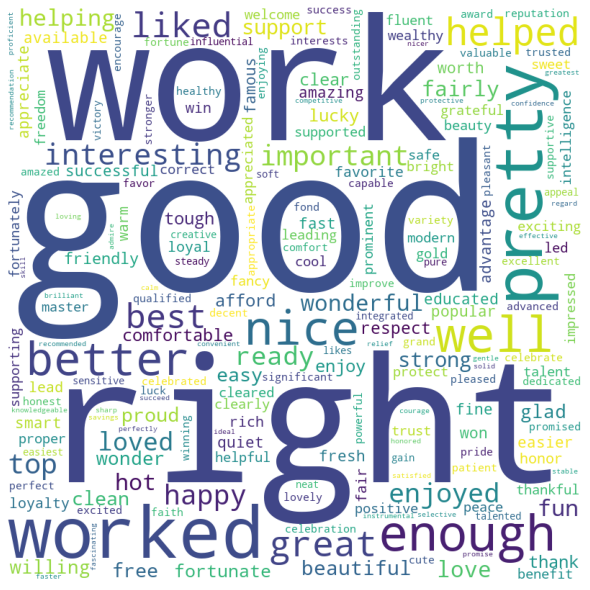






Category: B: Internment experience and memory, Positive Sentiment terms


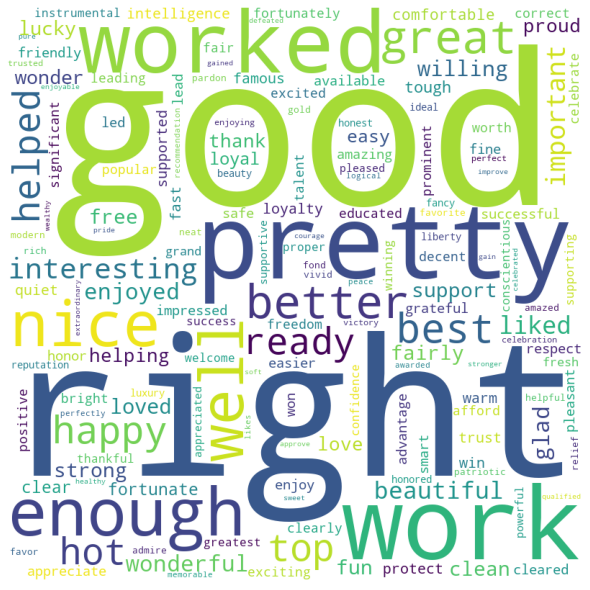






Category: C: Post-war experience, Positive Sentiment terms


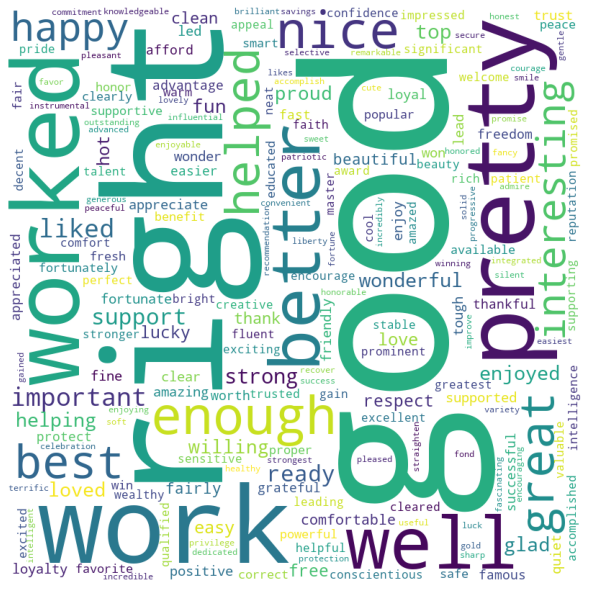






Category: A: Family immigration history and childhood experience, Negative Sentiment terms


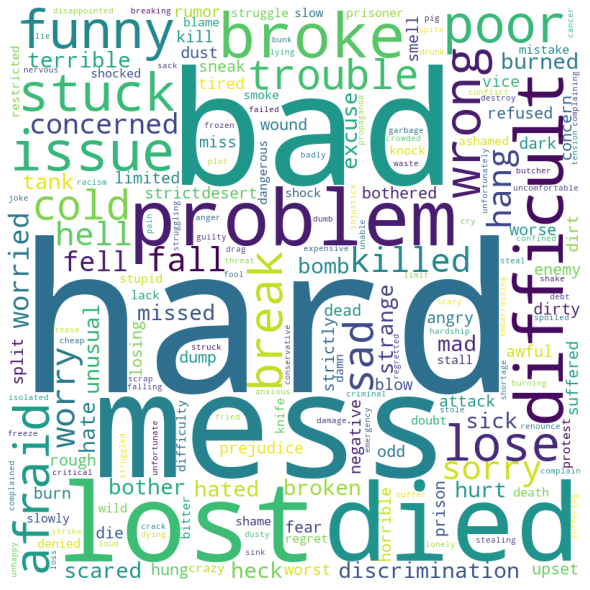






Category: B: Internment experience and memory, Negative Sentiment terms


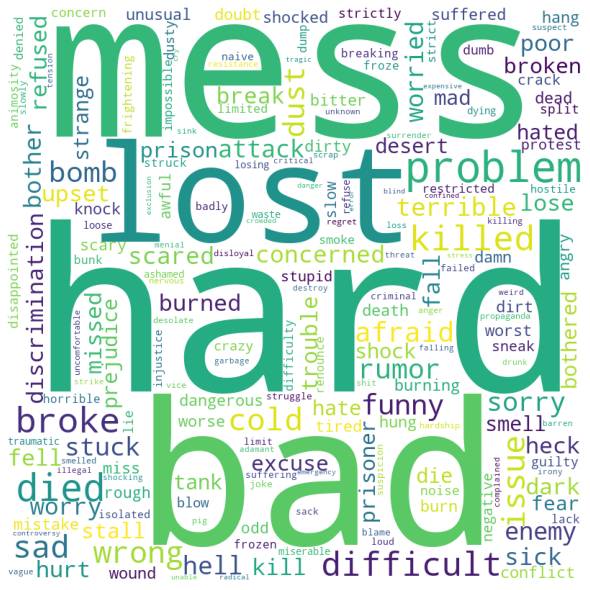






Category: C: Post-war experience, Negative Sentiment terms


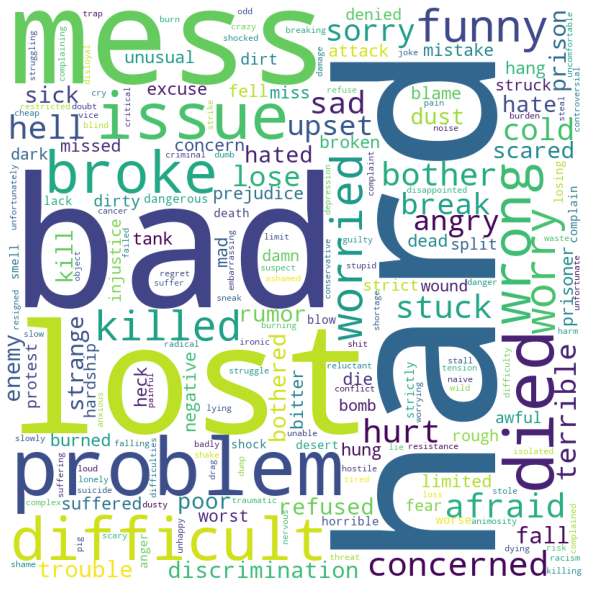

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

for col in sentiment_lexicons.columns[1:]:
  for row in range(sentiment_lexicons.shape[0]):
    #range(sentiment_lexicons.shape[0])
    print("Category: {}, {}".format(sentiment_lexicons['Categories'][row], col))
    wordcloud = WordCloud(width = 800, height = 800, collocations=False, background_color ='white', min_font_size = 10).generate(" ".join(sentiment_lexicons[col][row]))
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()
    print()
    print()
    print()
    print()
    print()


In [19]:
#unique_sentiment_lexicons
from collections import Counter
for col in sentiment_lexicons.columns[1:]:
    for row in range(sentiment_lexicons.shape[0]):
        print("Category: {}, most common 100 {}".format(sentiment_lexicons['Categories'][row], col))
        print()
        print(Counter(sentiment_lexicons[col][row]).most_common(100))
        print()
        print("-----------------------------------------------------")
        print()

Category: A: Family immigration history and childhood experience, most common 100 Positive Sentiment terms

[('like', 17648), ('good', 5874), ('right', 4240), ('work', 3869), ('worked', 3749), ('pretty', 3402), ('enough', 1600), ('well', 1569), ('nice', 1497), ('better', 1368), ('helped', 1182), ('great', 1105), ('liked', 970), ('best', 956), ('interesting', 732), ('important', 666), ('top', 639), ('happy', 627), ('enjoyed', 609), ('ready', 585), ('loved', 562), ('hot', 467), ('fun', 467), ('helping', 461), ('wonderful', 442), ('fairly', 415), ('love', 409), ('strong', 399), ('support', 398), ('beautiful', 381), ('clean', 347), ('easy', 339), ('proud', 331), ('free', 319), ('willing', 292), ('wonder', 284), ('glad', 283), ('fortunate', 260), ('afford', 246), ('lucky', 239), ('thank', 232), ('tough', 227), ('comfortable', 226), ('enjoy', 223), ('clear', 222), ('respect', 198), ('friendly', 189), ('famous', 174), ('fast', 168), ('won', 167), ('successful', 167), ('fresh', 164), ('easier'